In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plt.rcParams['figure.figsize'] = (8,5)


In [4]:
# Load and preview data
df = pd.read_csv("healthcare_dataset.csv")
print("Original shape:", df.shape)
display(df.head())

# Drop ID-like columns
id_cols = [c for c in df.columns if 'id' in c.lower()]
if id_cols:
    print("Dropping ID-like columns:", id_cols)
    df = df.drop(columns=id_cols)

# Drop missing rows
df = df.dropna()
print("After dropping NA:", df.shape)

# Use smaller random sample for light processing
if len(df) > 1000:
    df = df.sample(n=1000, random_state=42)
print("Sampled shape:", df.shape)

# Separate features and target
target = "Test Results"
X = df.drop(columns=[target])
y = df[target]

print("Features shape:", X.shape)
print("Target classes:", y.unique())


Original shape: (55500, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


Dropping ID-like columns: ['Insurance Provider']
After dropping NA: (55500, 14)
Sampled shape: (1000, 14)
Features shape: (1000, 13)
Target classes: ['Inconclusive' 'Abnormal' 'Normal']


In [5]:
# One-hot encoding for categorical features
X = pd.get_dummies(X, drop_first=True)
print("Feature shape after encoding:", X.shape)


Feature shape after encoding: (1000, 4520)


In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y if len(y.unique()) < 20 else None)

# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)
print("Model trained successfully.")


Model trained successfully.


In [7]:
# Predictions and evaluation
y_pred = clf.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.36

Confusion Matrix:
[[ 7  0 62]
 [ 1  0 61]
 [ 2  2 65]]

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.70      0.10      0.18        69
Inconclusive       0.00      0.00      0.00        62
      Normal       0.35      0.94      0.51        69

    accuracy                           0.36       200
   macro avg       0.35      0.35      0.23       200
weighted avg       0.36      0.36      0.24       200



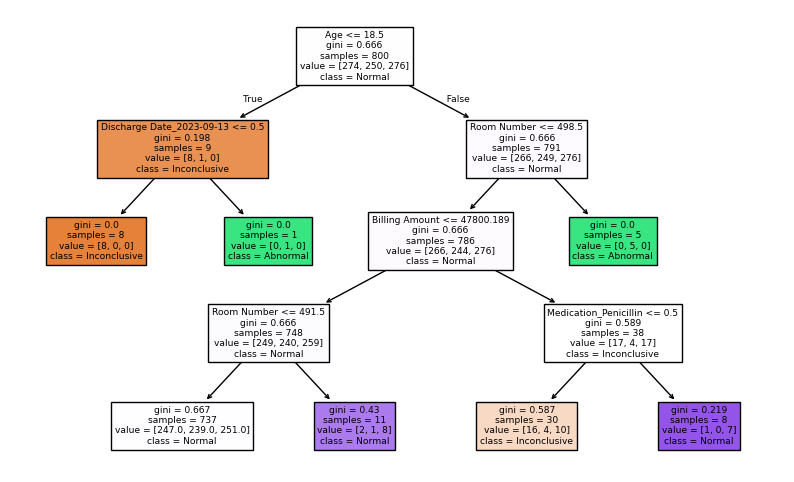

In [8]:
# Simple tree visualization
plt.figure(figsize=(10,6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()
